# 1. Loading libraries and data
## 1.1 Loading libraries

In [1]:
!pip install opencage

     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 3.2MB 33.1MB/s 


In [2]:
!pip install geopandas

     |████████████████████████████████| 1.0MB 27.7MB/s 
     |████████████████████████████████| 15.3MB 251kB/s 
     |████████████████████████████████| 6.6MB 24.3MB/s 


In [3]:
import requests
from bs4 import BeautifulSoup
import re
import json
import pandas as pd
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from opencage.geocoder import OpenCageGeocode

In [4]:
# You need to create an account on OpenCage Geocode to get your API_KEY
API_KEY = '3db3e1d359414d408daf10bdb16a01e3'
url = 'http://insideairbnb.com/get-the-data.html'

In [5]:
r = requests.get(url)
soup = BeautifulSoup(r.text,'html.parser')

In [6]:
villes = soup.select('h2')
villes

[<h2>Amsterdam, North Holland, The Netherlands</h2>,
 <h2>Antwerp, Flemish Region, Belgium</h2>,
 <h2>Asheville, North Carolina, United States</h2>,
 <h2>Athens, Attica, Greece</h2>,
 <h2>Australia</h2>,
 <h2>Austin, Texas, United States</h2>,
 <h2>Bangkok, Central Thailand, Thailand</h2>,
 <h2>Barcelona, Catalonia, Spain</h2>,
 <h2>Barossa Valley, South Australia, Australia</h2>,
 <h2>Barwon South West, Vic, Victoria, Australia</h2>,
 <h2>Beijing, Beijing, China</h2>,
 <h2>Belize, Belize, Belize</h2>,
 <h2>Bergamo, Lombardia, Italy</h2>,
 <h2>Berlin, Berlin, Germany</h2>,
 <h2>Bologna, Emilia-Romagna, Italy</h2>,
 <h2>Bordeaux, Nouvelle-Aquitaine, France</h2>,
 <h2>Boston, Massachusetts, United States</h2>,
 <h2>Bristol, England, United Kingdom</h2>,
 <h2>Broward County, Florida, United States</h2>,
 <h2>Brussels, Brussels, Belgium</h2>,
 <h2>Buenos Aires, Ciudad AutÃ³noma de Buenos Aires, Argentina</h2>,
 <h2>Cambridge, Massachusetts, United States</h2>,
 <h2>Cape Town, Western Cape,

In [7]:
# La balise h2 contient le noms de toutes les villes dans le dataset de airbnb
geocoder = OpenCageGeocode(API_KEY)
length = 0
dico_villes = {}

# Boucle pour récupérer le noms des villes + un peu de preprocessing
for i in range(len(villes)):
    print(i)
    villes[i] = villes[i].string
    if i == 4:
      print(i)
      villes[i] = 'australia'
      dico_villes[villes[i]] = geocoder.geocode(villes[i])
      dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 9:
        print(i)
        villes[i] = 'barwon-south-west-vic'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 24:
        print(i)
        villes[i] = 'clark-county-nv'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 41:
        print(i)
        villes[i] = 'ireland'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 56:
        print(i)
        villes[i] = 'malta'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 64:
        print(i)
        villes[i] = 'new-zealand'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 79:
        print(i)
        villes[i] = 'salem-or'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    elif i == 100:
        print(i)
        villes[i] = 'twin-cities-msa'
        dico_villes['twin-cities-msa'] = {'lat': 44.986656,'lng': -93.258133}
    elif i == 107:
        print(i)
        villes[i] = 'washington-dc'
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
    else:
        print(i)
        villes[i] = re.findall('\w+,|\w+\s\w+,|\w+\s\w+\s\w+,',villes[i])
        villes[i] = villes[i][0]
        length = len(villes[i]) - 1
        villes[i] = villes[i][0:length]
        villes[i] = villes[i].lower()
        villes[i] = re.sub('\s', '-', villes[i])
        dico_villes[villes[i]] = geocoder.geocode(villes[i])
        dico_villes[villes[i]] = dico_villes[villes[i]][0]['geometry']
        
print(villes)

0
0
1
1
2
2
3
3
4
4
5
5
6
6
7
7
8
8
9
9
10
10
11
11
12
12
13
13
14
14
15
15
16
16
17
17
18
18
19
19
20
20
21
21
22
22
23
23
24
24
25
25
26
26
27
27
28
28
29
29
30
30
31
31
32
32
33
33
34
34
35
35
36
36
37
37
38
38
39
39
40
40
41
41
42
42
43
43
44
44
45
45
46
46
47
47
48
48
49
49
50
50
51
51
52
52
53
53
54
54
55
55
56
56
57
57
58
58
59
59
60
60
61
61
62
62
63
63
64
64
65
65
66
66
67
67
68
68
69
69
70
70
71
71
72
72
73
73
74
74
75
75
76
76
77
77
78
78
79
79
80
80
81
81
82
82
83
83
84
84
85
85
86
86
87
87
88
88
89
89
90
90
91
91
92
92
93
93
94
94
95
95
96
96
97
97
98
98
99
99
100
100
101
101
102
102
103
103
104
104
105
105
106
106
107
107
108
108
109
109
['amsterdam', 'antwerp', 'asheville', 'athens', 'australia', 'austin', 'bangkok', 'barcelona', 'barossa-valley', 'barwon-south-west-vic', 'beijing', 'belize', 'bergamo', 'berlin', 'bologna', 'bordeaux', 'boston', 'bristol', 'broward-county', 'brussels', 'buenos-aires', 'cambridge', 'cape-town', 'chicago', 'clark-county-nv', 'columbus', 'c

In [8]:
print(dico_villes)

{'amsterdam': {'lat': 52.3727598, 'lng': 4.8936041}, 'antwerp': {'lat': 51.2211097, 'lng': 4.3997081}, 'asheville': {'lat': 35.6009498, 'lng': -82.5540161}, 'athens': {'lat': 37.9839412, 'lng': 23.7283052}, 'australia': {'lat': -24.7761086, 'lng': 134.755}, 'austin': {'lat': 30.2711286, 'lng': -97.7436995}, 'bangkok': {'lat': 13.7544238, 'lng': 100.4930399}, 'barcelona': {'lat': 41.3828939, 'lng': 2.1774322}, 'barossa-valley': {'lat': -34.6134149, 'lng': 138.9385455}, 'barwon-south-west-vic': {'lat': -37.9723305, 'lng': 142.2949476}, 'beijing': {'lat': 39.906217, 'lng': 116.3912757}, 'belize': {'lat': 16.8259793, 'lng': -88.7600927}, 'bergamo': {'lat': 45.7566557, 'lng': 9.7542192}, 'berlin': {'lat': 52.5170365, 'lng': 13.3888599}, 'bologna': {'lat': 44.4937577, 'lng': 11.3430308}, 'bordeaux': {'lat': 44.841225, 'lng': -0.5800364}, 'boston': {'lat': 42.3602534, 'lng': -71.0582912}, 'bristol': {'lat': 51.4538022, 'lng': -2.5972985}, 'broward-county': {'lat': 26.1598074, 'lng': -80.46236

In [9]:
# Dictionnaire de la forme : {nom_ville : [url_listings_details, url_listings, url_neighbourhood_geojson}

length = 0
dico_soup = {}
for i in range(len(villes)):
    dico_soup[villes[i]] = soup.select('table.{} a'.format(villes[i]))
    dico_soup[villes[i]] = [str(dico_soup[villes[i]][0]), str(dico_soup[villes[i]][3]), str(dico_soup[villes[i]][6])]
    for j in range(len(dico_soup[villes[i]])):
        dico_soup[villes[i]][j] = re.findall('http://.+"\s', dico_soup[villes[i]][j])
        dico_soup[villes[i]][j] = dico_soup[villes[i]][j][0]
        length = len(dico_soup[villes[i]][j]) -2
        dico_soup[villes[i]][j] = dico_soup[villes[i]][j][0:length]

In [10]:
print(dico_soup['amsterdam'][0])

http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2021-04-09/data/listings.csv.gz


## 1.2 Choosing the town

In [17]:
town = []
n = 0
choice = ''
while(choice not in dico_soup.keys()):
    choice = input('Choose a town :')
    if choice in dico_soup.keys():
        town = dico_soup[choice]
        n+=1
    else :
        print("Town doesn't exist in the airbnb dataset, here is a list of the towns available")
        print(villes)

Choose a town :paris


## 1.2 Loading the listings and listing details files
The listings file is an overview file showing airbnb labels (columns names) and very useful for analysis and visualization. The unique identifier in the dataset is the "listing" id. This is basically the id of the advertisement.

In [18]:
listings_details = pd.read_csv(town[0], index_col='id')
listings = pd.read_csv(town[1], index_col='id')

In [19]:
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.04,1,286
3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,60,2,9,2019-10-24,0.17,1,365
5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,47,1,237,2021-04-12,1.65,1,58
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,90,10,272,2021-03-28,2.23,1,327
7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,365


In [20]:
listings_details.head()

,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,https://www.airbnb.com/rooms/2577,20210410122610,2021-04-14,Loft for 4 by Canal Saint Martin,"100 m2 loft (1100 sq feet) with high ceiling, ...",NaN,https://a0.muscache.com/pictures/09da057c-0120...,2827,https://www.airbnb.com/users/show/2827,Karine,2008-09-09,"Casablanca, Grand Casablanca, Morocco","Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,50%,67%,f,https://a0.muscache.com/im/pictures/user/17fe6...,https://a0.muscache.com/im/pictures/user/17fe6...,République,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,NaN,Entrepôt,NaN,48.86957,2.36127,Entire loft,Entire home/apt,4,NaN,2 baths,2.0,2.0,"[""Essentials"", ""Kitchen"", ""Heating"", ""Host gre...",$125.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,0,0,12,286,2021-04-14,1,0,0,2019-01-02,2019-01-02,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.04
3109,https://www.airbnb.com/rooms/3109,20210410122610,2021-04-13,zen and calm,<b>The space</b><br />I bedroom appartment in ...,Good restaurants<br />very close the Montparna...,https://a0.muscache.com/pictures/baeae9e2-cd53...,3631,https://www.airbnb.com/users/show/3631,Anne,2008-10-14,"Paris, Île-de-France, France",NaN,within a day,80%,0%,f,https://a0.muscache.com/im/users/3631/profile_...,https://a0.muscache.com/im/users/3631/profile_...,Alésia,1.0,1.0,"['email', 'phone', 'facebook', 'reviews']",t,f,"Paris, Île-de-France, France",Observatoire,NaN,48.83191,2.31870,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Smoke alarm"", ""Dishes and silverware"", ""Hair...",$60.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,30,60,90,365,2021-04-13,9,0,0,2016-12-27,2019-10-24,100.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,f,1,1,0,0,0.17
5396,https://www.airbnb.com/rooms/5396,20210410122610,2021-04-16,Explore the heart of old Paris,"Cozy, well-appointed and graciously designed s...","You are within walking distance to the Louvre,...",https://a0.muscache.com/pictures/52413/f9bf76f...,7903,https://www.airbnb.com/users/show/7903,Borzou,2009-02-14,"Istanbul, İstanbul, Turkey",We are both journalists based in the Middle Ea...,within an hour,100%,92%,f,https://a0.muscache.com/im/users/7903/profile_...,https://a0.muscache.com/im/users/7903/profile_...,Saint-Paul - Ile Saint-Louis,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"Paris, Ile-de-France, France",Hôtel-de-Ville,NaN,48.85247,2.35835,Entire apartment,Entire home/apt,2,NaN,1 bath,NaN,1.0,"[""Essentials"", ""TV with standard cable"", ""Dish...",$47.00,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,18,47,58,58,2021-04-16,237,17,3,2009-06-30,2021-04-12,90.0,9.0,9.0,10.0,10

Have a look on listings_details dataframe:

In [21]:
print(listings_details.shape)

(63090, 73)


In [23]:
target_columns = ["property_type", "accommodates", "first_review", "review_scores_value", "review_scores_cleanliness", "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "maximum_nights", "listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate"]
listings = pd.merge(listings, listings_details[target_columns], on='id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63090 entries, 2577 to 49135722
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            63028 non-null  object 
 1   host_id                         63090 non-null  int64  
 2   host_name                       61336 non-null  object 
 3   neighbourhood_group             0 non-null      float64
 4   neighbourhood                   63090 non-null  object 
 5   latitude                        63090 non-null  float64
 6   longitude                       63090 non-null  float64
 7   room_type                       63090 non-null  object 
 8   price                           63090 non-null  int64  
 9   minimum_nights                  63090 non-null  int64  
 10  number_of_reviews               63090 non-null  int64  
 11  last_review                     47784 non-null  object 
 12  reviews_per_month         

In [24]:
listings.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.04,1,286,Entire loft,4,2019-01-02,10.0,10.0,10.0,10.0,10.0,10.0,100.0,1125,https://www.airbnb.com/rooms/2577,f,"Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,50%
3109,zen and calm,3631,Anne,NaN,Observatoire,48.83191,2.31870,Entire home/apt,60,2,9,2019-10-24,0.17,1,365,Entire apartment,2,2016-12-27,10.0,10.0,10.0,10.0,10.0,10.0,100.0,30,https://www.airbnb.com/rooms/3109,f,NaN,within a day,80%
5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,47,1,237,2021-04-12,1.65,1,58,Entire apartment,2,2009-06-30,9.0,9.0,10.0,9.0,10.0,10.0,90.0,1125,https://www.airbnb.com/rooms/5396,f,We are both journalists based in the Middle Ea...,within an hour,100%
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,90,10,272,2021-03-28,2.23,1,327,Entire apartment,4,2011-04-08,10.0,9.0,10.0,10.0,10.0,10.0,94.0,130,https://www.airbnb.com/rooms/7397,t,"I am a writer,51, author of novels, books of l...",within an hour,100%
7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,365,Entire apartment,2,2010-05-10,10.0,10.0,10.0,10.0,10.0,10.0,96.0,365,https://www.airbnb.com/rooms/7964,f,Hello ! \r\nOur apartment is great and I am su...,NaN,NaN


In [25]:
listings = listings.drop(columns=['neighbourhood_group'])

In [26]:
listings.head()

,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,property_type,accommodates,first_review,review_scores_value,review_scores_cleanliness,review_scores_location,review_scores_accuracy,review_scores_communication,review_scores_checkin,review_scores_rating,maximum_nights,listing_url,host_is_superhost,host_about,host_response_time,host_response_rate
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2577,Loft for 4 by Canal Saint Martin,2827,Karine,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.04,1,286,Entire loft,4,2019-01-02,10.0,10.0,10.0,10.0,10.0,10.0,100.0,1125,https://www.airbnb.com/rooms/2577,f,"Arrivée à Casablanca il y a 4 ans, je suis amo...",within a day,50%
3109,zen and calm,3631,Anne,Observatoire,48.83191,2.31870,Entire home/apt,60,2,9,2019-10-24,0.17,1,365,Entire apartment,2,2016-12-27,10.0,10.0,10.0,10.0,10.0,10.0,100.0,30,https://www.airbnb.com/rooms/3109,f,NaN,within a day,80%
5396,Explore the heart of old Paris,7903,Borzou,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,47,1,237,2021-04-12,1.65,1,58,Entire apartment,2,2009-06-30,9.0,9.0,10.0,9.0,10.0,10.0,90.0,1125,https://www.airbnb.com/rooms/5396,f,We are both journalists based in the Middle Ea...,within an hour,100%
7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,90,10,272,2021-03-28,2.23,1,327,Entire apartment,4,2011-04-08,10.0,9.0,10.0,10.0,10.0,10.0,94.0,130,https://www.airbnb.com/rooms/7397,t,"I am a writer,51, author of novels, books of l...",within an hour,100%
7964,Large & sunny flat with balcony !,22155,Anaïs,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.05,1,365,Entire apartment,2,2010-05-10,10.0,10.0,10.0,10.0,10.0,10.0,96.0,365,https://www.airbnb.com/rooms/7964,f,Hello ! \r\nOur apartment is great and I am su...,NaN,NaN


# 2. Data exploration
## 2.1 Neighbourhoods



In [27]:
# Number of listings for each neighbourhood

num_lis = listings['neighbourhood'].value_counts().sort_values(ascending=True)
num_lis

Louvre                 1354
Palais-Bourbon         1685
Élysée                 1759
Luxembourg             1957
Hôtel-de-Ville         1999
Panthéon               2111
Bourse                 2132
Gobelins               2219
Observatoire           2491
Temple                 2736
Reuilly                2738
Opéra                  3099
Passy                  3176
Buttes-Chaumont        3641
Ménilmontant           3652
Batignolles-Monceau    4168
Entrepôt               4502
Vaugirard              4782
Popincourt             5918
Buttes-Montmartre      6971
Name: neighbourhood, dtype: int64

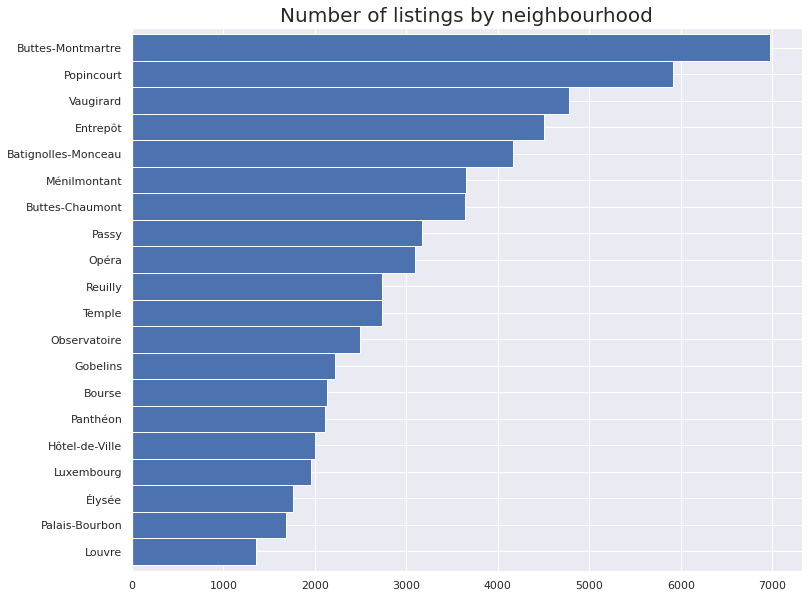

In [28]:
# Number of listings for each neughbourhood on a horizontal bar plot

num_lis.plot.barh(figsize=(12, 10), width=1)
plt.title("Number of listings by neighbourhood", fontsize=20)
plt.show()

In [29]:
# latitude and longitude for each listing lists

latitude = listings['latitude'].tolist()
longitude = listings['longitude'].tolist()
long_lat = list(zip(latitude, longitude))
location = [dico_villes[choice]['lat'], dico_villes[choice]['lng']]

mapp = folium.Map(location=location, zoom_start=11)
FastMarkerCluster(data=long_lat).add_to(mapp)
mapp

## 2.2 Room types and property types
### 2.2.1 Room types


In [30]:
room_type = listings['room_type'].value_counts().sort_values(ascending=True)
room_type

Shared room          409
Hotel room          1358
Private room        7498
Entire home/apt    53825
Name: room_type, dtype: int64

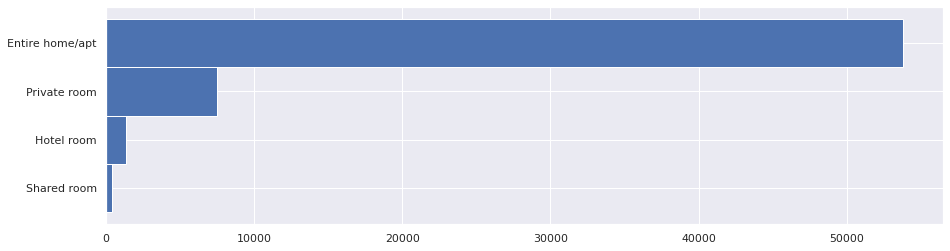

In [31]:
room_type.plot.barh(figsize=(15,4), width=1)
plt.show()

### 2.2.2 Property types
In the dataset, we find a lot of different property types.

In [32]:
listings.property_type.unique()

array(['Entire loft', 'Entire apartment', 'Private room in apartment',
       'Entire condominium', 'Room in bed and breakfast',
       'Private room in bed and breakfast', 'Entire house',
       'Private room in townhouse', 'Private room in house',
       'Private room in condominium', 'Entire guesthouse',
       'Shared room in apartment', 'Private room in guesthouse',
       'Entire townhouse', 'Entire guest suite', 'Boat',
       'Private room in loft', 'Tiny house', 'Entire villa',
       'Entire floor', 'Private room in guest suite',
       'Entire serviced apartment', 'Room in serviced apartment',
       'Houseboat', 'Room in boutique hotel',
       'Private room in serviced apartment', 'Treehouse', 'Earth house',
       'Entire cottage', 'Private room in nature lodge', 'Entire place',
       'Private room in earth house', 'Entire bed and breakfast',
       'Shared room in igloo', 'Shared room in loft',
       'Private room in chalet', 'Cave', 'Private room in villa',
       'Pr

In [33]:
prop_room_type = listings.groupby(['property_type', 'room_type'])['room_type'].count()
prop_room_type = prop_room_type.unstack()
prop_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room
property_type,,,,
Barn,3.0,NaN,NaN,NaN
Boat,10.0,NaN,NaN,NaN
Camper/RV,1.0,NaN,NaN,NaN
Campsite,1.0,NaN,NaN,NaN
Casa particular,1.0,NaN,NaN,NaN
...,...,...,...,...
Shared room in serviced apartment,NaN,NaN,NaN,2.0
Shared room in tiny house,NaN,NaN,NaN,2.0
Shared room in townhouse,NaN,NaN,NaN,2.0


In [34]:
prop_room_type['total'] = prop_room_type.iloc[:,:].sum(axis=1)
prop_room_type = prop_room_type.sort_values(by=['total'])
prop_room_type = prop_room_type[prop_room_type['total']>=100]
prop_room_type

room_type,Entire home/apt,Hotel room,Private room,Shared room,total
property_type,,,,,
Private room in house,NaN,NaN,109.0,NaN,109.0
Private room in bed and breakfast,NaN,NaN,137.0,NaN,137.0
Entire townhouse,160.0,NaN,NaN,NaN,160.0
Entire serviced apartment,181.0,NaN,NaN,NaN,181.0
Shared room in apartment,NaN,NaN,NaN,277.0,277.0
Private room in condominium,NaN,NaN,331.0,NaN,331.0
Entire house,346.0,NaN,NaN,NaN,346.0
Room in hotel,NaN,155.0,409.0,NaN,564.0
Entire loft,1081.0,NaN,NaN,NaN,1081.0


In [36]:
prop_room_type = prop_room_type.drop(columns=['total'])

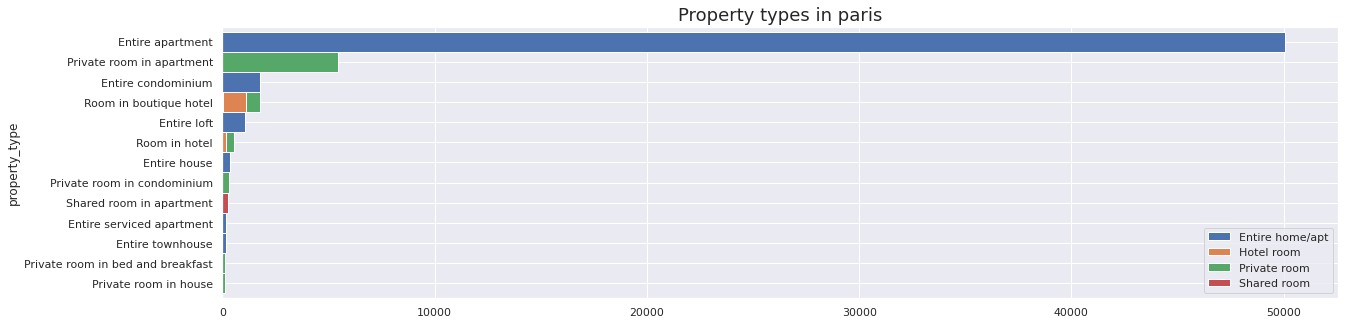

In [37]:
prop_room_type.plot.barh(stacked=True, width=1, figsize=(20,5))
plt.title('Property types in {}'.format(choice), fontsize = 18)
plt.legend(loc=4)
plt.show()

## 2.3 Accommodates (number of people)


In [38]:
accommodates = listings['accommodates'].value_counts().sort_index()
accommodates

0        53
1      3235
2     30967
3      6004
4     15295
5      2433
6      3423
7       456
8       733
9        85
10      198
11       31
12       81
13       13
14       27
15       23
16       33
Name: accommodates, dtype: int64

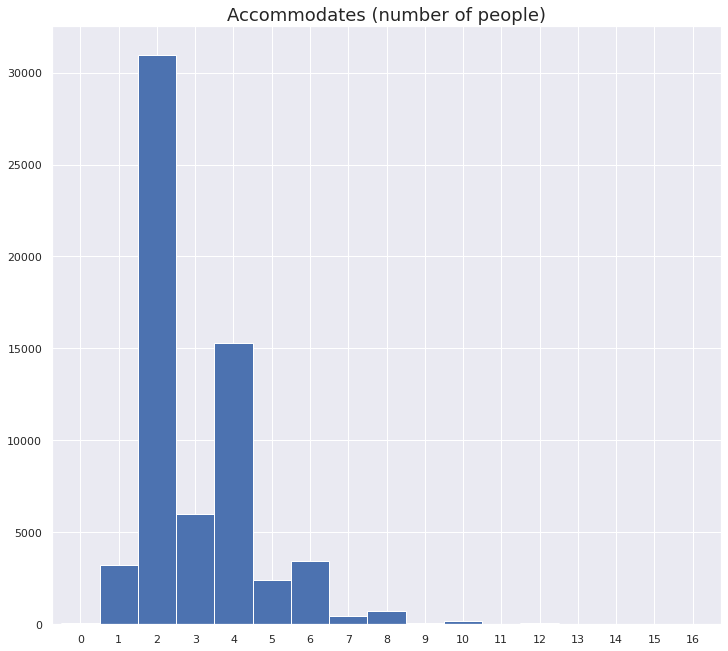

In [39]:
accommodates.plot.bar(figsize=(12,11), width=1, rot=0)
plt.title('Accommodates (number of people)', fontsize = 18)
plt.show()

# 3. Advice to the tourists
## 3.1 Average daily price per neighbourhood
 

In [40]:
price_neigh = listings[listings['accommodates']==2]
price_neigh = price_neigh.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
price_neigh

neighbourhood
Ménilmontant            61.679113
Buttes-Chaumont         61.819800
Reuilly                 64.775479
Gobelins                66.608614
Buttes-Montmartre       71.383583
Popincourt              72.586671
Entrepôt                73.867529
Batignolles-Monceau     75.430740
Observatoire            79.220353
Vaugirard               86.152258
Panthéon                89.297495
Bourse                  95.267742
Opéra                   95.938113
Temple                 101.971108
Hôtel-de-Ville         103.205184
Passy                  103.509489
Luxembourg             112.181443
Louvre                 127.239344
Palais-Bourbon         129.180678
Élysée                 156.905947
Name: price, dtype: float64

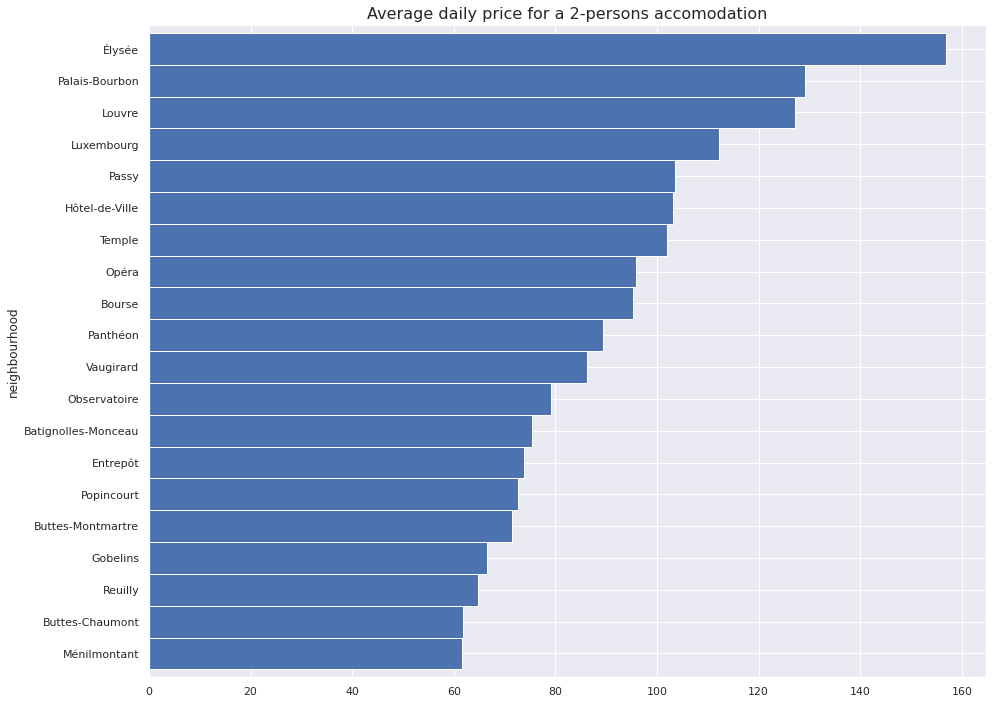

In [41]:
price_neigh.plot.barh(figsize=(15,12), width=1)
plt.title('Average daily price for a 2-persons accomodation', fontsize = 16)
plt.show()

In [42]:
price_neigh_df = pd.DataFrame(price_neigh)
price_neigh_df

,price
neighbourhood,
Ménilmontant,61.679113
Buttes-Chaumont,61.819800
Reuilly,64.775479
Gobelins,66.608614
Buttes-Montmartre,71.383583
Popincourt,72.586671
Entrepôt,73.867529
Batignolles-Monceau,75.430740
Observatoire,79.220353


In [43]:
geojson = gpd.read_file(town[2])
print(geojson)

          neighbourhood  ...                                           geometry
0   Batignolles-Monceau  ...  MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8...
1        Palais-Bourbon  ...  MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8...
2       Buttes-Chaumont  ...  MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9...
3                 Opéra  ...  MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8...
4              Entrepôt  ...  MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8...
5              Gobelins  ...  MULTIPOLYGON (((2.37491 48.83801, 2.37698 48.8...
6             Vaugirard  ...  MULTIPOLYGON (((2.29932 48.85217, 2.30088 48.8...
7               Reuilly  ...  MULTIPOLYGON (((2.41388 48.83357, 2.41401 48.8...
8                Louvre  ...  MULTIPOLYGON (((2.32801 48.86992, 2.32997 48.8...
9            Luxembourg  ...  MULTIPOLYGON (((2.34459 48.85405, 2.34428 48.8...
10               Élysée  ...  MULTIPOLYGON (((2.32584 48.86956, 2.32569 48.8...
11               Temple  ...  MULTIPOLYG

In [44]:
geojson = geojson.drop(columns=['neighbourhood_group'])
geojson

,neighbourhood,geometry
0,Batignolles-Monceau,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8..."
1,Palais-Bourbon,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8..."
2,Buttes-Chaumont,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9..."
3,Opéra,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8..."
4,Entrepôt,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8..."
5,Gobelins,"MULTIPOLYGON (((2.37491 48.83801, 2.37698 48.8..."
6,Vaugirard,"MULTIPOLYGON (((2.29932 48.85217, 2.30088 48.8..."
7,Reuilly,"MULTIPOLYGON (((2.41388 48.83357, 2.41401 48.8..."
8,Louvre,"MULTIPOLYGON (((2.32801 48.86992, 2.32997 48.8..."
9,Luxembourg,"MULTIPOLYGON (((2.34459 48.85405, 2.34428 48.8..."


In [45]:
geojson = pd.merge(geojson, price_neigh_df, on='neighbourhood', how='left')
geojson

,neighbourhood,geometry,price
0,Batignolles-Monceau,"MULTIPOLYGON (((2.29517 48.87396, 2.29504 48.8...",75.430740
1,Palais-Bourbon,"MULTIPOLYGON (((2.32090 48.86306, 2.32094 48.8...",129.180678
2,Buttes-Chaumont,"MULTIPOLYGON (((2.38943 48.90122, 2.39014 48.9...",61.819800
3,Opéra,"MULTIPOLYGON (((2.33978 48.88203, 2.33982 48.8...",95.938113
4,Entrepôt,"MULTIPOLYGON (((2.36469 48.88437, 2.36485 48.8...",73.867529
5,Gobelins,"MULTIPOLYGON (((2.37491 48.83801, 2.37698 48.8...",66.608614
6,Vaugirard,"MULTIPOLYGON (((2.29932 48.85217, 2.30088 48.8...",86.152258
7,Reuilly,"MULTIPOLYGON (((2.41388 48.83357, 2.41401 48.8...",64.775479
8,Louvre,"MULTIPOLYGON (((2.32801 48.86992, 2.32997 48.8...",127.239344
9,Luxembourg,"MULTIPOLYGON (((2.34459 48.85405, 2.34428 48.8...",112.181443


In [46]:
mappp = folium.Map(location = location, zoom_start= 11)
folium.GeoJson(data = geojson,
               tooltip = folium.features.GeoJsonTooltip(fields=['neighbourhood', 'price'], labels = True)
              ).add_to(mappp)
mappp

## 3.1 Review scores location, and location scores versus price

In [47]:
rev_score = listings[listings['number_of_reviews']>=10]
rev_score = rev_score.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
rev_score

neighbourhood
Buttes-Chaumont        9.471880
Buttes-Montmartre      9.473387
Ménilmontant           9.487967
Entrepôt               9.626421
Gobelins               9.689526
Batignolles-Monceau    9.726475
Observatoire           9.757313
Reuilly                9.769386
Popincourt             9.822509
Vaugirard              9.851449
Bourse                 9.874468
Passy                  9.892034
Opéra                  9.899563
Élysée                 9.933898
Temple                 9.935484
Palais-Bourbon         9.947785
Panthéon               9.954087
Hôtel-de-Ville         9.971334
Louvre                 9.975083
Luxembourg             9.984791
Name: review_scores_location, dtype: float64

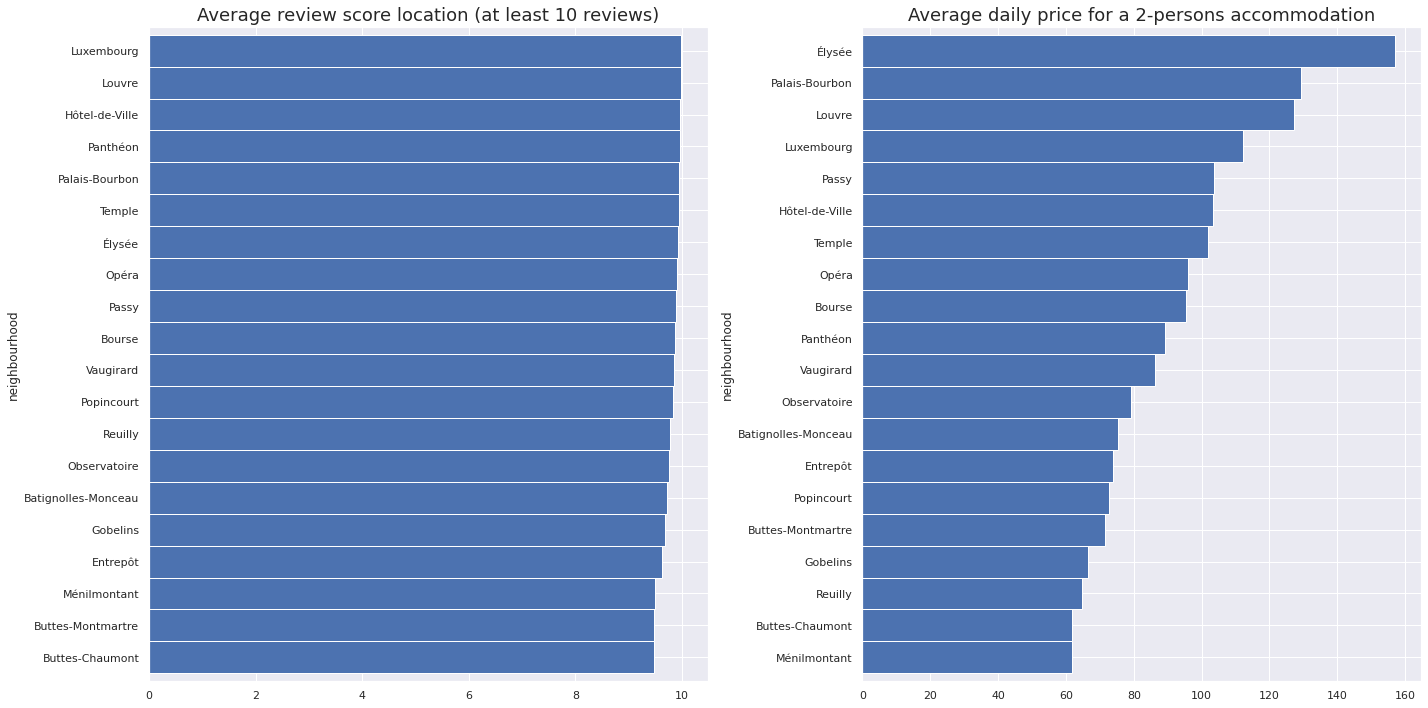

In [48]:
fig = plt.figure(figsize=(20,10))
sub1 = fig.add_subplot(1,2,1)
sub1 = rev_score.plot.barh(width=1)
plt.title('Average review score location (at least 10 reviews)', fontsize = 18)
sub2 = fig.add_subplot(1,2,2)
sub2 = price_neigh.plot.barh(width=1)
plt.title('Average daily price for a 2-persons accommodation', fontsize= 18)
plt.tight_layout()
plt.show()

In [ ]:
## Send me a message if you have any questions